<a href="https://colab.research.google.com/github/JacekPardyak/tb-data-science-talks/blob/master/2022-11-24/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with R and CPU

CPU: Central Processing Unit. Manage all the functions of a computer.

In [1]:
install.packages('keras')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [2]:
library(tidyverse)
library(keras)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# read the data
# train <- read_csv("/content/sample_data/mnist_train_small.csv", col_names = F) 
# or from package 
mnist <- dataset_mnist()
train_images <- mnist %>% .[['train']] %>% .[['x']] %>%
  array_reshape(c(60000, 28, 28, 1)) # reindex multi-dimensional array
test_images <- mnist %>% .[['test']] %>% .[['x']] %>%
  array_reshape(c(10000, 28, 28, 1))
train_labels <- mnist %>% .[['train']] %>% .[['y']]
test_labels <- mnist %>% .[['test']] %>% .[['y']]
# class(train_images)
train_images %>% .[1,,,1]

Loaded Tensorflow version 2.9.2



0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,175,26,166,255,247,127,0,0,0,0
0,0,0,0,0,0,0,0,30,36,⋯,225,172,253,242,195,64,0,0,0,0
0,0,0,0,0,0,0,49,238,253,⋯,93,82,82,56,39,0,0,0,0,0
0,0,0,0,0,0,0,18,219,253,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,80,156,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,14,⋯,0,0,0,0,0,0,0,0,0,0


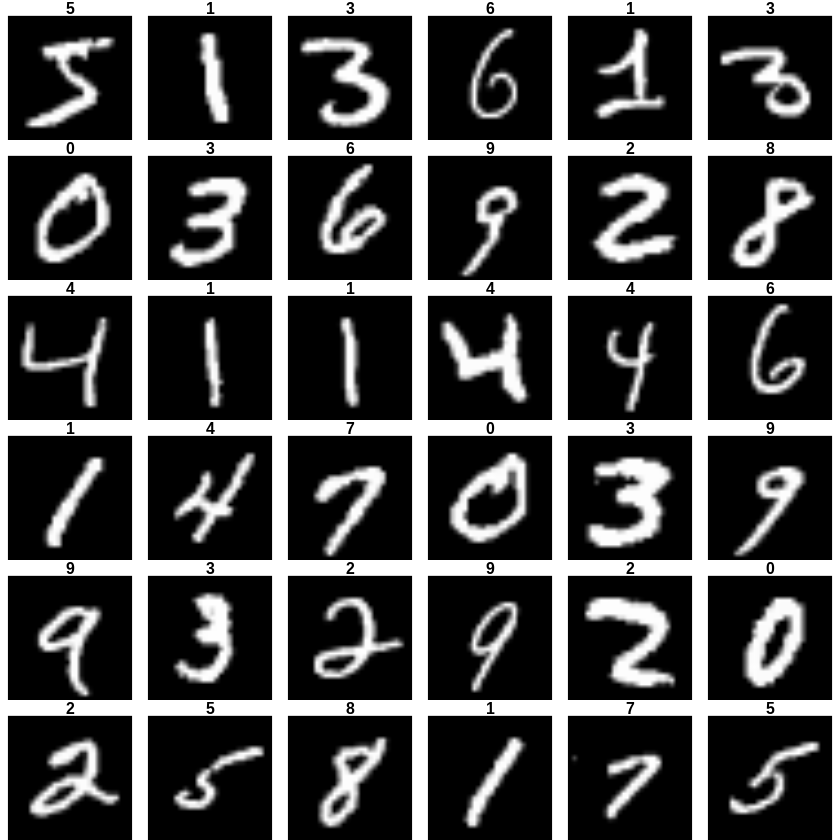

In [4]:
par(mfcol=c(6,6))
par(mar=c(0, 0, 1, 0), xaxs='i', yaxs='i')
for (idx in 1:36) {
  train_images %>% .[idx,,,1] %>% as.raster(max = 255) %>% plot()
  title(main = train_labels[idx])
}

In [5]:
# transform the data with scaling
train_images <- train_images / 255
test_images <- test_images / 255
# and another reshape - classes
train_labels <- to_categorical(train_labels)
test_labels <- to_categorical(test_labels)

In [6]:
# describe the model
# convolutional neural networks (convnets)
model <- keras_model_sequential() %>% # Keras Model composed of a linear stack of layers
  layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = "relu",
                input_shape = c(28, 28, 1)) %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu") %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu")
model

# layer_conv_2d() -  one of 20 convolutional layers of 100 different type layers,
#       convolution of f, g is f*g and expresses how the shape of f is modified by g
## filters - dim of the output space
## kernel_size - w * h of the 2D convolution window
## activation - activation function 
### linear function: 'a(x) = x’
### relu, rectified linear unit function: 'a(x) = max(x, 0)'
### sigmoid function, 'a(x) = 1 / (1 + exp(-x))'
### softmax function: 'a(x) = e^x_i / Σ e^x_i'
## input shape - image_height, image_width, image_channels
# layer_max_pooling_2d - down scale matrix (tensor) by pool_size

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_2 (Conv2D)                  (None, 26, 26, 32)              320         
 max_pooling2d_1 (MaxPooling2D)     (None, 13, 13, 32)              0           
 conv2d_1 (Conv2D)                  (None, 11, 11, 64)              18496       
 max_pooling2d (MaxPooling2D)       (None, 5, 5, 64)                0           
 conv2d (Conv2D)                    (None, 3, 3, 64)                36928       
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
________________________________________________________________________________

In [8]:
# add classification layers
model <- model %>%
  layer_flatten() %>%
  layer_dense(units = 64, activation = "relu") %>%
  layer_dense(units = 10, activation = "softmax")
model
# layer_flatten() - transforms from a 2d-array to a 1d-array
# layer_dense() - fully connected neural layer with 64 (10) neurons (nodes)
## last layer with 'softmax' activation returns an array of 10 probability scores that sum to 1

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_2 (Conv2D)                  (None, 26, 26, 32)              320         
 max_pooling2d_1 (MaxPooling2D)     (None, 13, 13, 32)              0           
 conv2d_1 (Conv2D)                  (None, 11, 11, 64)              18496       
 max_pooling2d (MaxPooling2D)       (None, 5, 5, 64)                0           
 conv2d (Conv2D)                    (None, 3, 3, 64)                36928       
 flatten (Flatten)                  (None, 576)                     0           
 dense_1 (Dense)                    (None, 64)                      36928       
 dense (Dense)                      (None, 10)                      650         
Total params: 93,322
Trainable params: 93,322
Non-trainable params: 0
________________________________________________________________________________

In [9]:
# compile the model
model %>% compile(
  optimizer = "rmsprop",
  loss = "categorical_crossentropy",
  metrics = c("accuracy")
)
# compile - add more settings
## optimizer - method how the model is updated after one run
## loss - measure how accurate is model during training
## metrics - method how we monitor training and testing steps

In [10]:
# fit the model on training data
model %>% fit(
  train_images, train_labels,
  epochs = 5, batch_size=64
)
# train the model
## specify in- and dependent variables
## epochs - number of runs
## batch_size - number of samples used in one run

In [11]:
# evaluate the model on test data
model %>% evaluate(test_images, test_labels)

loss   accuracy 
0.02775154 0.99110001

In [12]:
# get prediction from model
predictions <- model %>% predict(train_images)
predictions[10, ]

[1] 3.327983e-12 2.612962e-08 1.092257e-07 6.559222e-11 9.999991e-01
 [6] 6.269905e-11 3.149719e-11 4.634784e-07 2.569114e-07 2.296032e-10

In [13]:
# class labels from 0 to 9, so it is "5" predicted 
which.max(predictions[10, ]) - 1

[1] 4

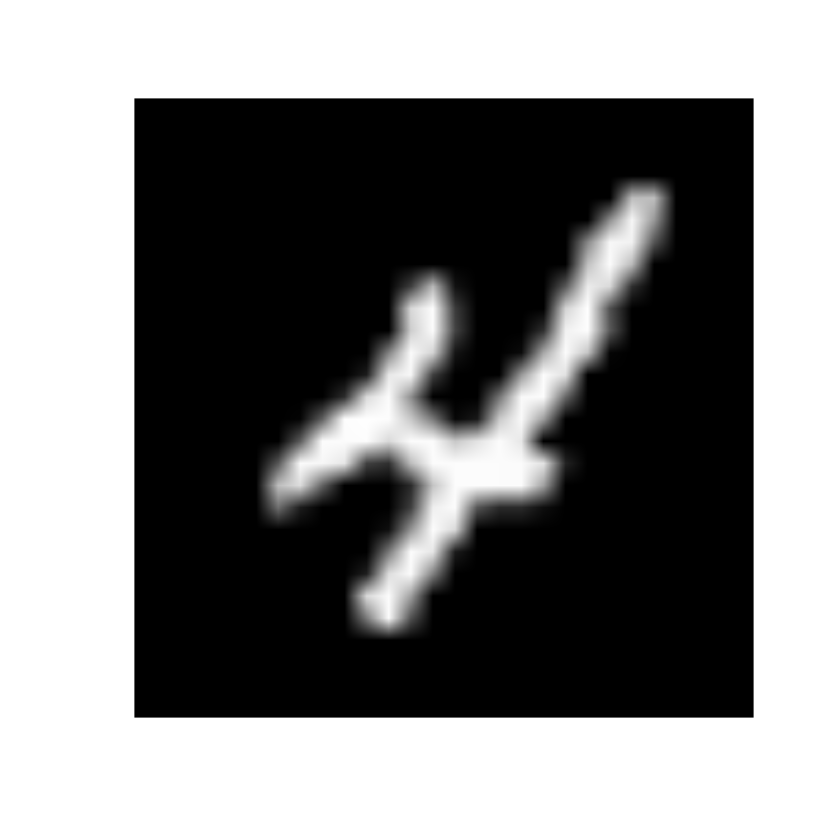

In [14]:
train_images %>% .[10,,,1] %>% as.raster(max = 1) %>% plot()

[1] 8

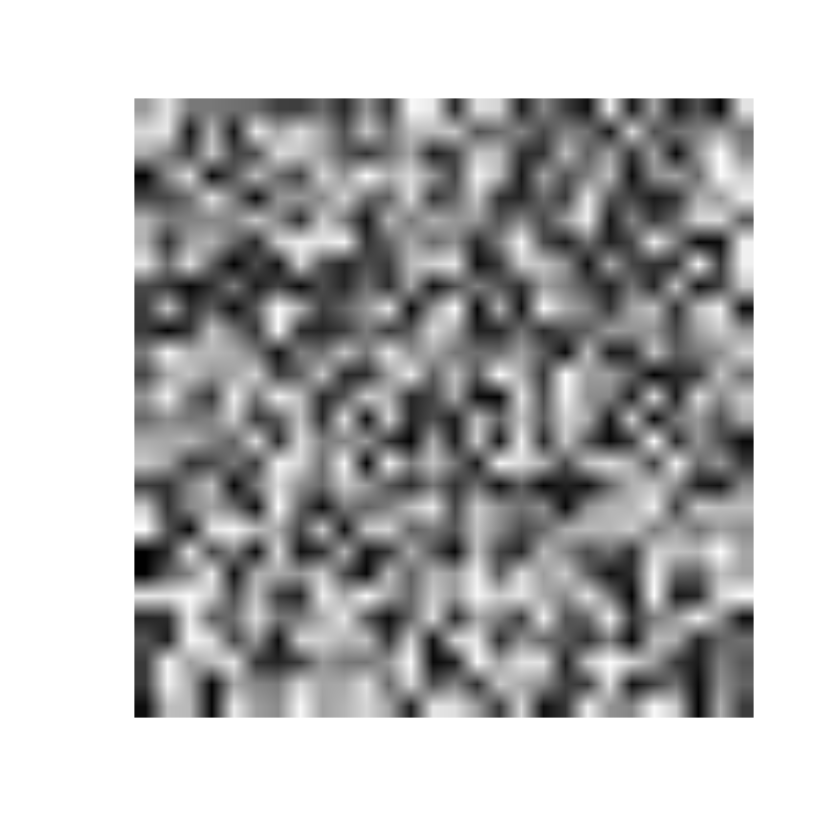

In [15]:
# predictions for noise
z = runif(28 * 28) %>% matrix(nrow = 28)
z %>% as.raster(max = 1) %>% plot()
y = test_images %>% head(1)
y[1,,,1] <- z
pred <- model %>% predict(y)
which.max(pred) - 1

[1] 6

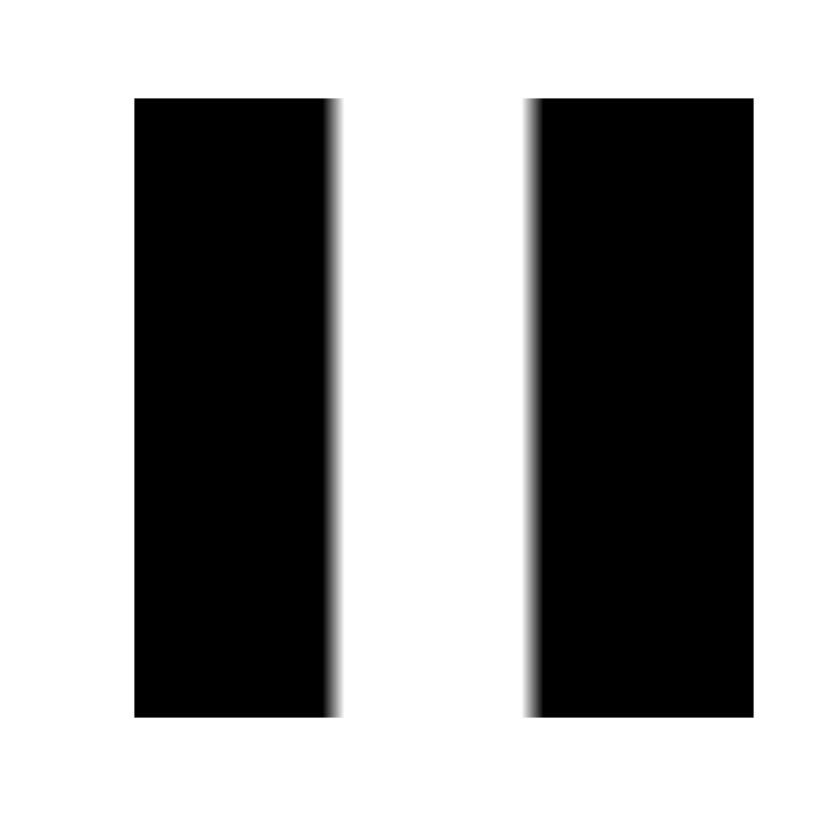

In [16]:
# predictions for noise
z = rep(0, 28 * 28) %>% matrix(nrow = 28)
for(i in c(1:28)){
  for(j in c(10:18))
  z[i,j] <- 1
}
z %>% as.raster(max = 1) %>% plot()
y = test_images %>% head(1)
y[1,,,1] <- z
pred <- model %>% predict(y)
which.max(pred) - 1

# References:
- https://www.manning.com/books/deep-learning-with-r

- https://towardsdatascience.com/introduction-to-deep-learning-with-keras-in-r-81bafd903a7a#c794

- https://tensorflow.rstudio.com/